# Task 1: Data Analysis Workflow for Brent Oil Prices


# 1. Data Loading

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
# Load your data and continue with analysis
file_path = r'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-10\data\Copy of BrentOilPrices.csv'
df = pd.read_csv(file_path)
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


# Initial Data Exploration and Cleaning
# Check for missing values and data types

In [12]:
print("Data Summary:")
df.info()


Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [13]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [14]:
# If the date column is not in datetime format, convert it
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Drop any rows with missing dates (if necessary)
df.dropna(subset=['Date'], inplace=True)

C:\Users\MMM\AppData\Local\Temp\ipykernel_3564\1395305911.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [15]:
# Sort data by date to ensure it's in chronological order
df = df.sort_values(by='Date').reset_index(drop=True)

# Visualize the Data
# Plot the time series of Brent oil prices

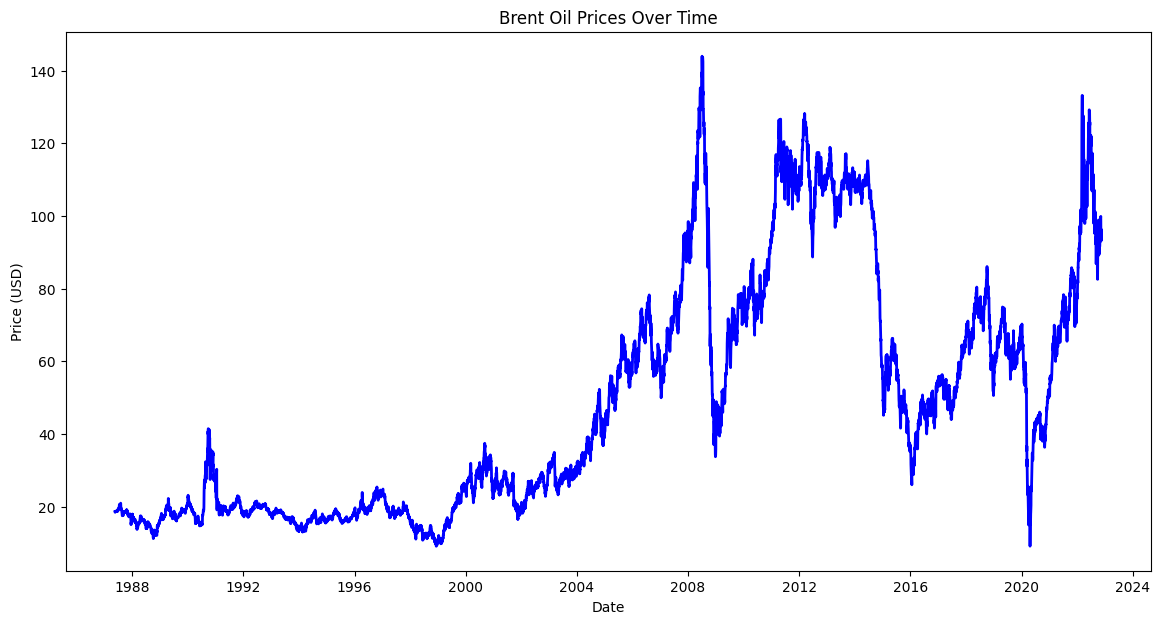

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], color='blue', linewidth=2)
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

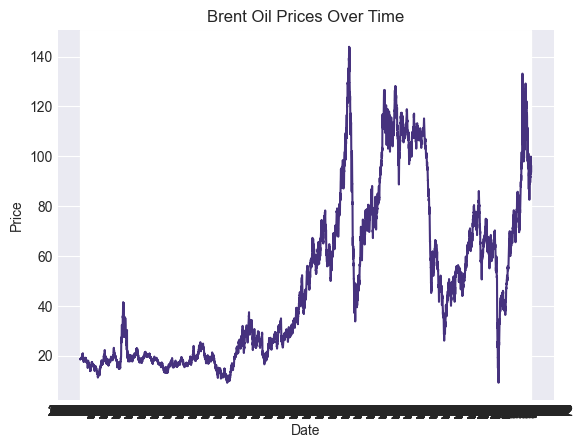

In [28]:
# Set an available style
plt.style.use('seaborn-v0_8-darkgrid')  # Using a similar available style
sns.set_palette("viridis")  # Optional: Set color palette for consistency

# Load your data and continue with analysis
file_path = r'C:\Users\MMM\Documents\10 Academy File\KAIM-Week-10\data\Copy of BrentOilPrices.csv'
df = pd.read_csv(file_path)

# Example plot
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Brent Oil Prices Over Time')
plt.show()

# 2. Data Cleaning

In [29]:
# Convert the Date column to datetime format, and handle any errors in parsing
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any rows where the Date conversion failed (NaT values)
missing_dates = df[df['Date'].isna()]
print("Rows with missing dates:", missing_dates)

# Drop rows with missing dates
df.dropna(subset=['Date'], inplace=True)

# Sort data by date to ensure chronological order
df = df.sort_values(by='Date').reset_index(drop=True)

# Check for other missing values in the dataset
print("Missing values after Date cleaning:")
print(df.isna().sum())


C:\Users\MMM\AppData\Local\Temp\ipykernel_3564\2829462459.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Rows with missing dates: Empty DataFrame
Columns: [Date, Price]
Index: []
Missing values after Date cleaning:
Date     0
Price    0
dtype: int64


# 3. Exploratory Data Analysis (EDA)

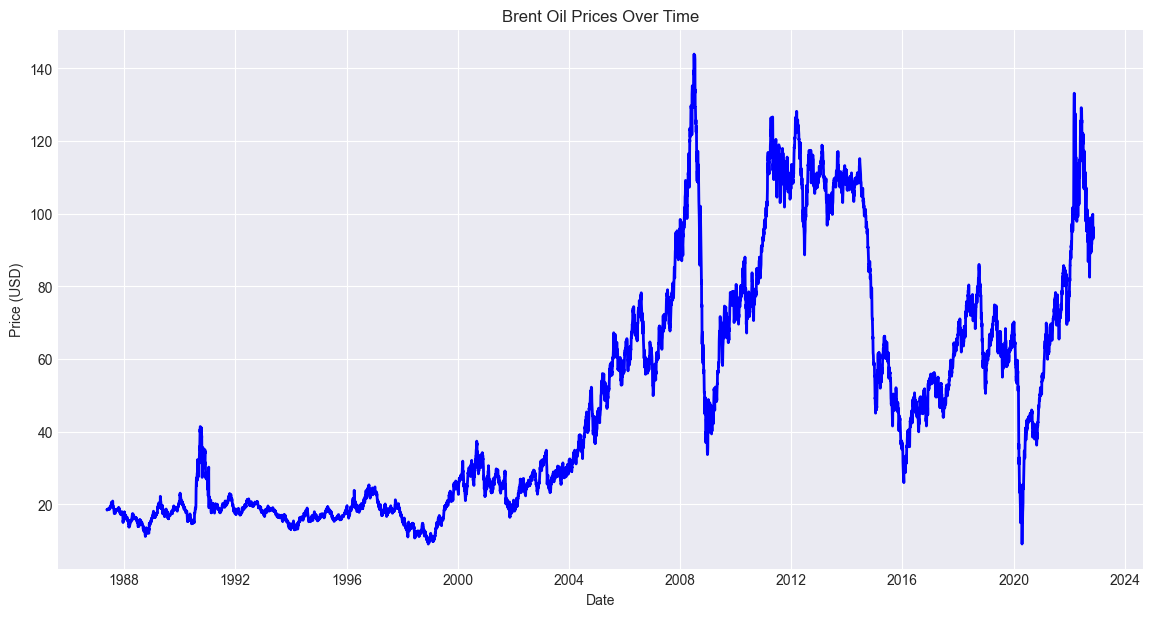

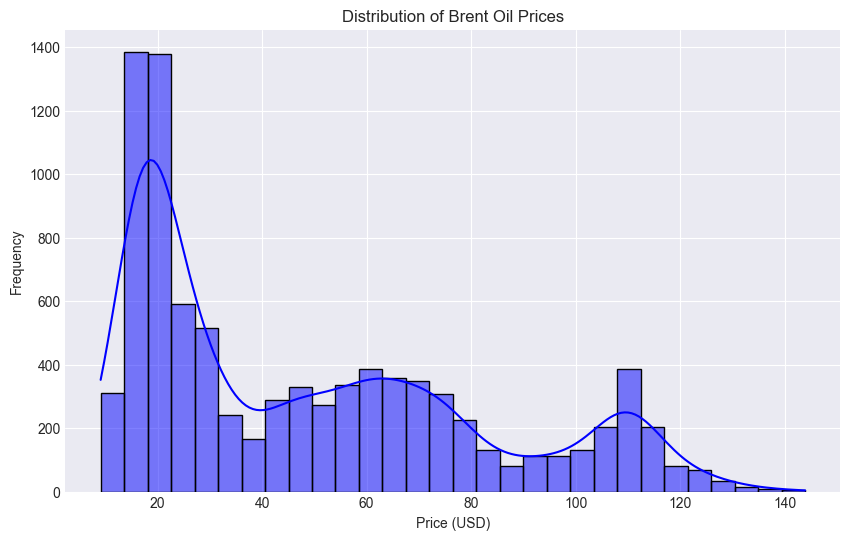

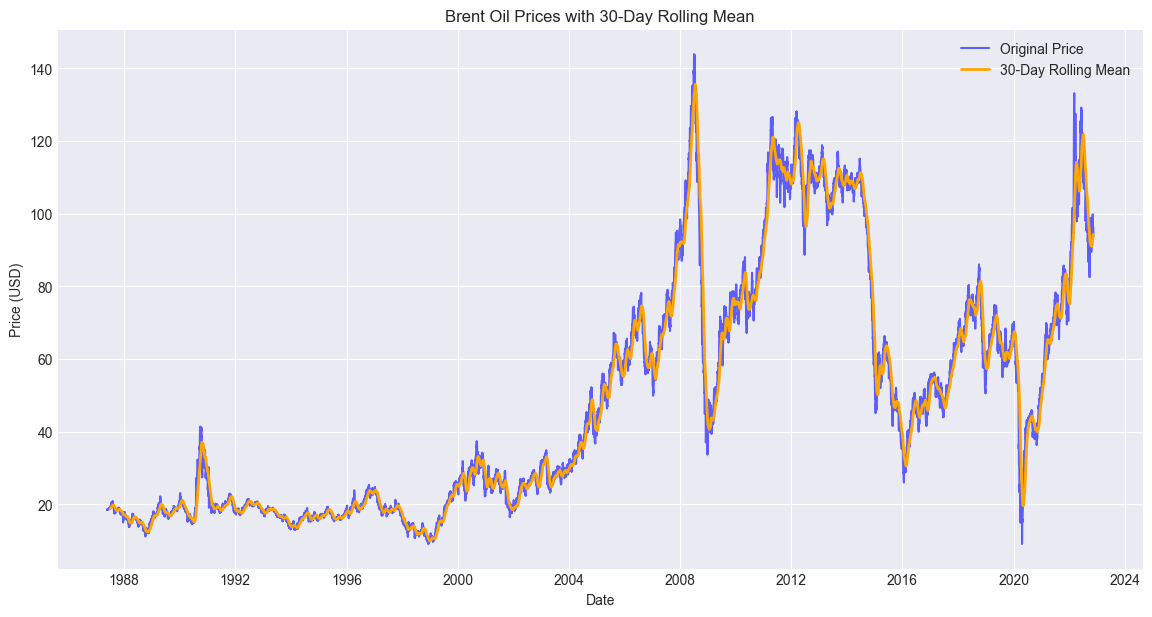

Summary Statistics for Brent Oil Prices:
count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


In [30]:
# Plot the time series of Brent oil prices over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], color='blue', linewidth=2)
plt.title("Brent Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

# Distribution plot of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Brent Oil Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

# Calculate and display rolling mean to observe trends
df['Rolling_Mean'] = df['Price'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Original Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['Rolling_Mean'], label='30-Day Rolling Mean', color='orange', linewidth=2)
plt.title("Brent Oil Prices with 30-Day Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Print basic statistics for understanding price trends
print("Summary Statistics for Brent Oil Prices:")
print(df['Price'].describe())


     Year  Month       Price
0    1987      5   18.580000
1    1987      6   18.860476
2    1987      7   19.856522
3    1987      8   18.979524
4    1987      9   18.313182
..    ...    ...         ...
422  2022      7  111.925714
423  2022      8  100.446364
424  2022      9   89.764762
425  2022     10   93.331905
426  2022     11   95.999000

[427 rows x 3 columns]


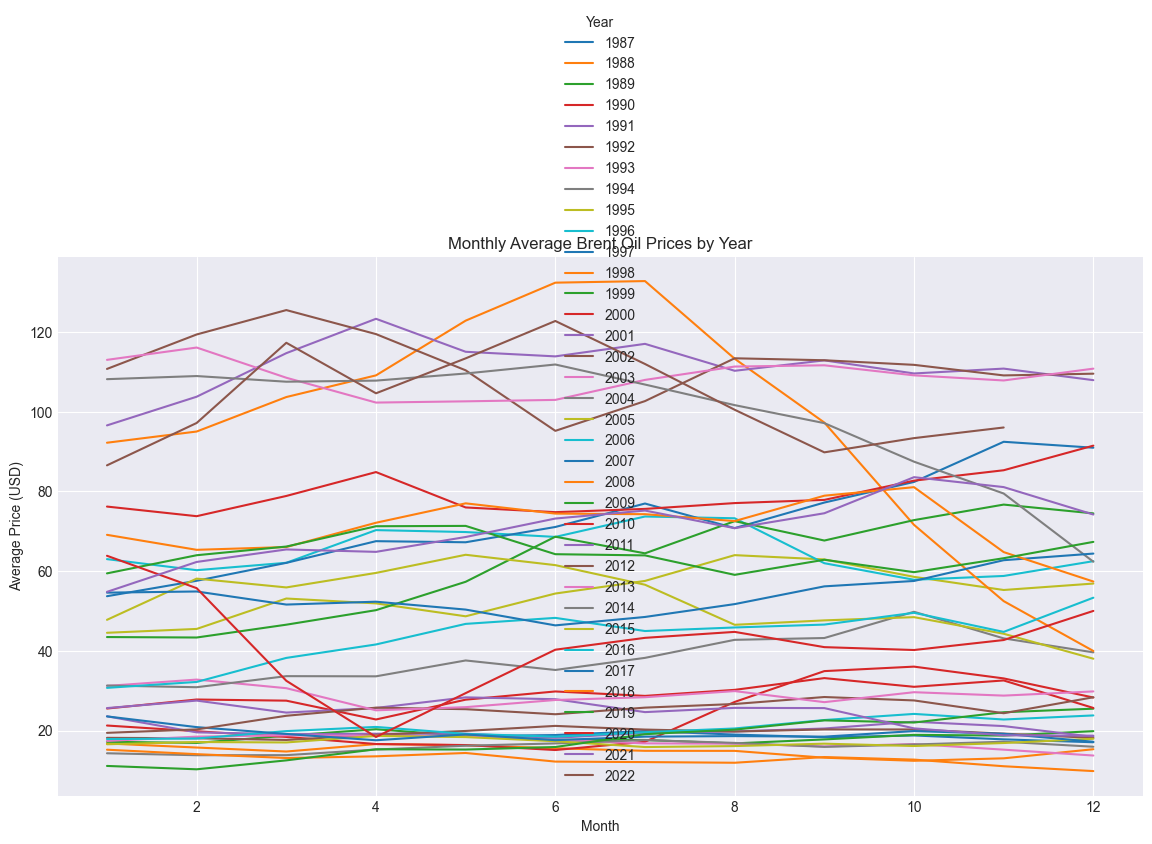

In [31]:
# Calculate monthly and yearly averages to identify seasonal trends
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Monthly average prices
monthly_avg = df.groupby(['Year', 'Month'])['Price'].mean().reset_index()
print(monthly_avg)

# Plotting monthly trend
plt.figure(figsize=(14, 7))
sns.lineplot(x='Month', y='Price', hue='Year', data=monthly_avg, palette="tab10")
plt.title("Monthly Average Brent Oil Prices by Year")
plt.xlabel("Month")
plt.ylabel("Average Price (USD)")
plt.show()


In [33]:
# Define Analysis Workflow Steps
workflow_steps = {
    "1. Data Loading": "Load data and check for completeness.",
    "2. Data Cleaning": "Handle missing values, format date, and verify consistency.",
    "3. Exploratory Data Analysis (EDA)": "Analyze price trends, seasonality, and fluctuations.",
    "4. Statistical Analysis": "Identify correlations, mean, variance, and other statistics.",
    "5. Model Preparation": "Prepare data inputs for modeling, if required.",
    "6. Data Visualization": "Present findings through clear visualizations."}

In [34]:
# Display the workflow steps
for step, description in workflow_steps.items():
    print(f"{step}: {description}")

# Step 6: Document Key Concepts and Assumptions
assumptions = [
    "Data is accurate and free from errors.",
    "No major economic events have introduced outliers not relevant to typical analysis.",
    "Sampling frequency is consistent (e.g., daily).",
    "Brent oil price data is sufficient to represent general oil market trends."
]

print("\nKey Assumptions:")
for i, assumption in enumerate(assumptions, 1):
    print(f"{i}. {assumption}")

# Step 7: Identify Communication Channels
# Define the main channels and formats for sharing results
communication_plan = {
    "1. Stakeholder Presentation": "Present findings through visuals and summaries.",
    "2. Dashboard": "Create an interactive dashboard (optional) to track ongoing trends.",
    "3. Report": "Deliver a written report with in-depth analysis and recommendations."
}

print("\nCommunication Plan:")
for channel, description in communication_plan.items():
    print(f"{channel}: {description}")

# Summary of the Workflow
print("\nData Analysis Workflow Completed. Proceed with detailed analysis in Task 2.")

1. Data Loading: Load data and check for completeness.
2. Data Cleaning: Handle missing values, format date, and verify consistency.
3. Exploratory Data Analysis (EDA): Analyze price trends, seasonality, and fluctuations.
4. Statistical Analysis: Identify correlations, mean, variance, and other statistics.
5. Model Preparation: Prepare data inputs for modeling, if required.
6. Data Visualization: Present findings through clear visualizations.

Key Assumptions:
1. Data is accurate and free from errors.
2. No major economic events have introduced outliers not relevant to typical analysis.
3. Sampling frequency is consistent (e.g., daily).
4. Brent oil price data is sufficient to represent general oil market trends.

Communication Plan:
1. Stakeholder Presentation: Present findings through visuals and summaries.
2. Dashboard: Create an interactive dashboard (optional) to track ongoing trends.
3. Report: Deliver a written report with in-depth analysis and recommendations.

Data Analysis Wo